In [1]:
import pandas as pd
from pycaret.classification import setup, compare_models, create_model, tune_model, evaluate_model, save_model, load_model

In [2]:
## 데이터 로드
data=pd.read_csv('../titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# 환경 설정
exp1 = setup(data, target="Survived", ignore_features=['PassengerId', 'Name', 'Ticket', 'Cabin'])

,Description,Value
0,Session id,1635
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 10)"
5,Transformed train set shape,"(623, 10)"
6,Transformed test set shape,"(268, 10)"
7,Ignore features,4
8,Numeric features,5
9,Categorical features,2


In [4]:
# 모델 비교
best_models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8267,0.8508,0.6899,0.8292,0.7508,0.6202,0.6280,0.0210
lightgbm,Light Gradient Boosting Machine,0.8138,0.8434,0.7109,0.7886,0.7436,0.5985,0.6044,0.1200
xgboost,Extreme Gradient Boosting,0.8074,0.8358,0.7025,0.7735,0.7336,0.5839,0.5879,0.0770
rf,Random Forest Classifier,0.8042,0.8360,0.6942,0.7701,0.7290,0.5767,0.5795,0.0340
ada,Ada Boost Classifier,0.8026,0.8325,0.7274,0.7517,0.7354,0.5785,0.5827,0.0190
et,Extra Trees Classifier,0.8009,0.8118,0.7024,0.7584,0.7284,0.5719,0.5737,0.0300
lr,Logistic Regression,0.7849,0.8419,0.7065,0.7253,0.7133,0.5417,0.5440,0.3870
ridge,Ridge Classifier,0.7833,0.8441,0.6853,0.7296,0.7034,0.5338,0.5370,0.0120
lda,Linear Discriminant Analysis,0.7817,0.8440,0.6853,0.7263,0.7019,0.5307,0.5339,0.0110
nb,Naive Bayes,0.7720,0.8032,0.6185,0.7447,0.6737,0.5012,0.5077,0.1860


In [5]:
# gbc 모델 훈련
gbc_model = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8730,0.9263,0.7917,0.8636,0.8261,0.7264,0.7281
1,0.7778,0.8189,0.6250,0.7500,0.6818,0.5132,0.5183
2,0.8254,0.8600,0.7083,0.8095,0.7556,0.6207,0.6240
3,0.7903,0.7380,0.5652,0.8125,0.6667,0.5208,0.5391
4,0.8710,0.9090,0.7917,0.8636,0.8261,0.7238,0.7256
5,0.8387,0.8860,0.7917,0.7917,0.7917,0.6601,0.6601
6,0.8710,0.9068,0.7083,0.9444,0.8095,0.7149,0.7319
7,0.8226,0.8701,0.6667,0.8421,0.7442,0.6112,0.6209
8,0.7581,0.7763,0.5417,0.7647,0.6341,0.4612,0.4765


In [6]:
# 모델 평가
evaluate_model(gbc_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [7]:
# gbc 모델 하이퍼파라미터를 튜닝해보기
tune_model_gbc =tune_model(gbc_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.9113,0.7917,0.8261,0.8085,0.6947,0.6951
1,0.7619,0.8216,0.7500,0.6667,0.7059,0.5070,0.5095
2,0.7619,0.8162,0.7083,0.6800,0.6939,0.4992,0.4995
3,0.7903,0.7737,0.6522,0.7500,0.6977,0.5384,0.5415
4,0.8548,0.8909,0.7917,0.8261,0.8085,0.6917,0.6921
5,0.8226,0.8476,0.7500,0.7826,0.7660,0.6232,0.6236
6,0.8387,0.9167,0.7083,0.8500,0.7727,0.6493,0.6558
7,0.7742,0.8476,0.5833,0.7778,0.6667,0.5011,0.5130
8,0.7581,0.8141,0.5833,0.7368,0.6512,0.4698,0.4773


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [8]:
# 중요한 피쳐값을 확인
print(tune_model_gbc.feature_names_in_)

['Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked_S' 'Embarked_C'
 'Embarked_Q']


In [9]:
print(tune_model_gbc.feature_importances_)

[0.20102073 0.43104438 0.12664803 0.04404936 0.0099401  0.1637094
 0.01229921 0.00498115 0.00630764]


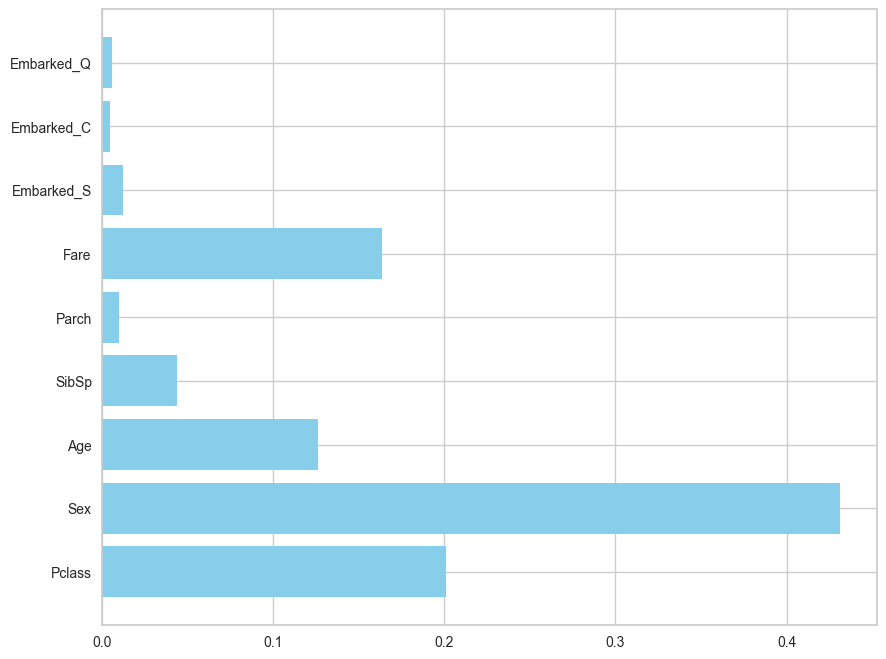

In [10]:
# 피쳐 중요도 그려보기
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.barh(tune_model_gbc.feature_names_in_, tune_model_gbc.feature_importances_, color='skyblue')
plt.show()

In [11]:
tune_model_gbc.get_params

<bound method BaseEstimator.get_params of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=1635, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)>

In [12]:
# 모델 저장
save_model(tune_model_gbc, 'tune_model_gbc')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pclass', 'Age', 'SibSp', 'Parch',
                                              'Fare'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=['Sex...
                                             criterion='friedman_mse', init=None,
                                             lear

In [13]:
# 모델 로드
load_model_gbc = load_model('tune_model_gbc')

Transformation Pipeline and Model Successfully Loaded


In [14]:
load_model_gbc

Pipeline(memory=FastMemory(location=C:\Users\Admin\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Pclass', 'Age', 'SibSp', 'Parch',
                                             'Fare'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 Trans...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=1635, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)